In [534]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [535]:
pd.__version__

'0.25.1'

# Intro

Pandas' groupby is undoubtly one of the most powerful functionalities that Pandas brings to the table. However, most users only utilize a fraction of the capabilities of `groupby`. 

`Groupby` allows to adopt a split-apply-combine approach to your data set. This is comparable to slicing and dicing your data such that it serves your specific need.

On a high level this means:
1. split the data based on column(s)/condition(s) into groups
2. apply a function/transformation to all the groups and combine the results into an output

# 0. Load the data

We are going to use data from a hypothetical sales division where we have, among other columns ficticious sales reps, order leads, order values, the company the deal might happen with and the date of the order lead.

In [536]:
order_leads = pd.read_csv(
    'https://raw.githubusercontent.com/FBosler/Medium-Data-Exploration/master/order_leads.csv',
    parse_dates = [3]
)
sales_team = pd.read_csv(
    'https://raw.githubusercontent.com/FBosler/Medium-Data-Exploration/master/sales_team.csv',
    parse_dates = [3]
)
df = pd.merge(order_leads,sales_team,on=['Company Id','Company Name'])
df = df.rename(columns={'Order Value':'Val','Converted':'Sale'})
df

,Order Id,Company Id,Company Name,Date,Val,Sale,Sales Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ
...,...,...,...,...,...,...,...,...
99995,HKZFX556ZQRZJZWR,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2017-11-06,7516,0,Ida Woodward,LF3CPWWZKSNB1AXI
99996,962CSDMAJ49E0CRK,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2018-08-02,442,1,Ida Woodward,LF3CPWWZKSNB1AXI
99997,ZW7RO9TLL6EVVJEC,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2014-11-02,8544,0,Ida Woodward,LF3CPWWZKSNB1AXI
99998,LNKGIWMZ9RT49IE9,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2017-04-01,6650,0,Ida Woodward,LF3CPWWZKSNB1AXI


# 1. Groupby: Split the data based on condition/column into groups

The default approach of calling groupby, is by explicitly providing a column name to split the dataset by. However, and this is less known, you can also pass a Series (has to have the same length as the dataframe) to groupby. 
This means that you can group by a processed version of a column, without having to create a new helper column for that.

### groupby sales rep
First let's create a grouped DataFrame, i.e. split the dataset up.

In [537]:
grouped = df.groupby('Sales Rep')
grouped

In [538]:
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

### show all groups
calling `groups` on the grouped object returns the list of indices for every group (as every row can be uniquely identified via it's index)

In [539]:
grouped.groups

{'Aaron Hendrickson': Int64Index([25612, 25613, 25614, 25615, 25616, 25617, 25618, 25619, 25620,
             25621,
             ...
             25894, 25895, 25896, 25897, 25898, 25899, 25900, 25901, 25902,
             25903],
            dtype='int64', length=292),
 'Adam Sawyer': Int64Index([67140, 67141, 67142, 67143, 67144, 67145, 67146, 67147, 67148,
             67149,
             ...
             67454, 67455, 67456, 67457, 67458, 67459, 67460, 67461, 67462,
             67463],
            dtype='int64', length=324),
 'Adele Kimmel': Int64Index([90915, 90916, 90917, 90918, 90919, 90920, 90921, 90922, 90923,
             90924,
             ...
             91020, 91021, 91022, 91023, 91024, 91025, 91026, 91027, 91028,
             91029],
            dtype='int64', length=115),
 'Adrian Daugherty': Int64Index([31483, 31484, 31485, 31486, 31487, 31488, 31489, 31490, 31491,
             31492,
             ...
             31842, 31843, 31844, 31845, 31846, 31847, 31848, 318

### select a specific group

In [540]:
grouped.get_group('Aaron Hendrickson')

,Order Id,Company Id,Company Name,Date,Val,Sale,Sales Rep,Sales Rep Id
25612,3BJY12LWBN7D0GJL,CE4544HJOFMONMH2,Follow-Up Boundary,2014-09-04,1940,0,Aaron Hendrickson,AEMLQ09IYM72ACBL
25613,W3HHOSC1H6A1PW37,CE4544HJOFMONMH2,Follow-Up Boundary,2015-09-24,2109,0,Aaron Hendrickson,AEMLQ09IYM72ACBL
25614,G9JKIZO4WD945GBH,CE4544HJOFMONMH2,Follow-Up Boundary,2014-12-06,4300,1,Aaron Hendrickson,AEMLQ09IYM72ACBL
25615,BKIJVKZ7REVN6P8B,CE4544HJOFMONMH2,Follow-Up Boundary,2017-05-07,3026,0,Aaron Hendrickson,AEMLQ09IYM72ACBL
25616,WFHGWR4PAD04A2GJ,CE4544HJOFMONMH2,Follow-Up Boundary,2016-01-20,5033,0,Aaron Hendrickson,AEMLQ09IYM72ACBL
...,...,...,...,...,...,...,...,...
25899,NATK7K3TZUH32BBE,CGDGXAW6GNU6JIEG,Fiftieth Art'S,2015-01-27,6095,1,Aaron Hendrickson,AEMLQ09IYM72ACBL
25900,EGD6IRB0UML62XB0,CGDGXAW6GNU6JIEG,Fiftieth Art'S,2018-11-04,7652,1,Aaron Hendrickson,AEMLQ09IYM72ACBL
25901,9Z18A7D1T8EUH58D,CGDGXAW6GNU6JIEG,Fiftieth Art'S,2016-05-08,4746,0,Aaron Hendrickson,AEMLQ09IYM72ACBL
25902,R0LUW64V2F3O2HSD,CGDGXAW6GNU6JIEG,Fiftieth Art'S,2017-02-16,6158,0,Aaron Hendrickson,AEMLQ09IYM72ACBL


For the following examples we will use the simplest version of the apply step (and just count the rows in each group) via the `size` method. We do this, so that we can focus on the groupby operations. 

We will go into much more detail regarding the apply methods in section 2 of the article. 

### Basic Example: Count rows in each group

In [541]:
grouped.size()

Sales Rep
Aaron Hendrickson    292
Adam Sawyer          324
Adele Kimmel         115
Adrian Daugherty     369
Adrianna Shelton      37
                    ... 
Willie Lin            44
Willie Rau            95
Willie Sanchez       309
Yvonne Jones          74
Yvonne Lindsey        67
Length: 499, dtype: int64

### Advanced Example: Group by first name of sales rep

In [542]:
# Grouping by first name of our Sales Rep without creating a column
df.groupby(
    df['Sales Rep'].str.split(' ').str[0]
).size()

Sales Rep
Aaron        292
Adam         324
Adele        115
Adrian       369
Adrianna      37
            ... 
Wesley       144
Wilbert      213
William     1393
Willie       448
Yvonne       141
Length: 318, dtype: int64

### Advanced Example:  Grouping by whether or not there is a "William" in the name of the rep

In [543]:
df.groupby(
    df['Sales Rep'].apply(lambda x: 'William' in x)
).size()

Sales Rep
False    97111
True      2889
dtype: int64

### Advanced Example: Group by random series (for illustrative purposes only)

In [544]:
# Grouping random letters (obviously does not make sense)
df.groupby(
    pd.Series(np.random.choice(list('ABCDG'),len(df)))
).size()

A    19852
B    19949
C    20184
D    19912
G    20103
dtype: int64

### Advanced Example:  Grouping by 3 evenly cut "Order Value" buckets

In [545]:
# qcut bins the passed Series into q evenly sized parts (and labels the bins)
df.groupby(
    pd.qcut(x=df['Val'],q=3,labels=['low','mid','high'])
).size()

Val
low     33339
mid     33336
high    33325
dtype: int64

### Advanced Example: Grouping by cutom "Order Value" buckets

In [547]:
# cut bins the passed Series into defined bins
df.groupby(
    pd.cut(df['Val'],[0,3000,5000,7000,10000])
).size()

Val
(0, 3000]        29220
(3000, 5000]     19892
(5000, 7000]     20359
(7000, 10000]    30529
dtype: int64

## `pd.Grouper`
The biggest "gotcha" in that area for me was understanding pd.Grouper, which allows seamless aggregation on different date/time granularities.


### Advanced Example: Grouping by year

In [548]:
df.groupby(pd.Grouper(key='Date',freq='Y')).size()

Date
2014-12-31    19956
2015-12-31    20054
2016-12-31    20133
2017-12-31    20079
2018-12-31    19778
Freq: A-DEC, dtype: int64

### Advanced Example: Grouping by quarter

In [552]:
# grouping by year
df.groupby(pd.Grouper(key='Date',freq='SM')).size()

Date
2013-12-31    761
2014-01-15    837
2014-01-31    820
2014-02-15    740
2014-02-28    817
             ... 
2018-10-31    810
2018-11-15    805
2018-11-30    824
2018-12-15    837
2018-12-31     50
Freq: SM-15, Length: 121, dtype: int64

### Advanced Example: Grouping by multiple columns

In [553]:
df.groupby(['Sales Rep','Company Name']).size()

Sales Rep          Company Name               
Aaron Hendrickson  6-Foot Homosexuals             20
                   63D House'S                    27
                   Angular Liberalism             28
                   Boon Blish'S                   18
                   Business-Like Structures       21
                                                  ..
Yvonne Jones       Entry-Limiting Westinghouse    20
                   Intractable Fairgoers          18
                   Smarter Java                   17
Yvonne Lindsey     Meretricious Fabrication       28
                   Shrill Co-Op                   39
Length: 4619, dtype: int64

# 2. Apply and Combine: Apply a function/transformation to all groups and combine the results into an output

In the previous section we discussed how to group the data based on various conditions. This section deals with available functions that we can apply to the groups before combining them to a final result.

The section is structured along how to use
1. apply,
2. agg(regate),
3. transform, and
4. filter,
on a grouped object.

If you are anything like me when I started using groupby, you are probably using a combination of 1. and 2. along the lines of:

`group = df.groupby('GROUP')` and then:
- `group.apply(mean)`
- `group.agg(mean)`
- `group['INTERSTING COLUMN'].apply(mean)`
- `group.agg({'INTERSTING COLUMN':mean})`
- `group.mean()`

Where `mean` could also be another function.

All of them work. And most of the time, the result is going to be roughly what you expected it to be. However, there are nuances to apply and agg that are worthwhile pointing out.

Additionally, but much more importantly there are two lesser-known extremly powerful functions that can be used on a grouped object, `filter` and `transform`.

### `Apply`: Let's get  `apply` out of the way
This is somewhat confusing, as we often talk about applying functions while there also is an apply function. But bear with me. The `apply` function applies a function along an axis of the DataFrame. This could be either column-wise or row-wise.
`apply` is not strictly speaking a function that can only be used in the context of groupby. It could also used on an entire dataframe, like in the following example.

In [554]:
_ = pd.DataFrame(
    np.random.random((2,6)),
    columns=list('ABCDEF')
)
_

,A,B,C,D,E,F
0,0.400871,0.964452,0.305504,0.252755,0.542108,0.911006
1,0.035872,0.729973,0.453693,0.330489,0.967016,0.590400


In [555]:
_.apply(sum, axis=0) # axis=0 is default, so you can drop that

A    0.436743
B    1.694425
C    0.759197
D    0.583244
E    1.509123
F    1.501406
dtype: float64

In [556]:
_.apply(sum, axis=1)

0    3.376695
1    3.107443
dtype: float64

But it can also be used in a groupby context. Which makes sense, considering the fact that each group is a smaller DataFrame on its own. Keep in mind that the function will be applied to the entire DataFrame. This means typically you want to select the columns you are `applying` a function to. We will leave it at these examples and instead focus on `agg(regation)` which is the "intended" way of aggregating groups.

In [557]:
df.groupby(
    pd.Grouper(key='Date',freq='Y')
)['Sale'].apply(sum)

Date
2014-12-31    3681
2015-12-31    3800
2016-12-31    3881
2017-12-31    3068
2018-12-31    2478
Freq: A-DEC, Name: Sale, dtype: int64

In [558]:
df.groupby(
    pd.Grouper(key='Date',freq='Y')
)['Val','Sale'].apply(sum)

,Val,Sale
Date,,
2014-12-31,100422394,3681
2015-12-31,101724648,3800
2016-12-31,101789642,3881
2017-12-31,101957784,3068
2018-12-31,100399962,2478


In [559]:
df.groupby(
    pd.Grouper(key='Date',freq='Y')
)['Val','Sale'].apply(sum).to_clipboard(sep=' ')

# `agg(regate)`

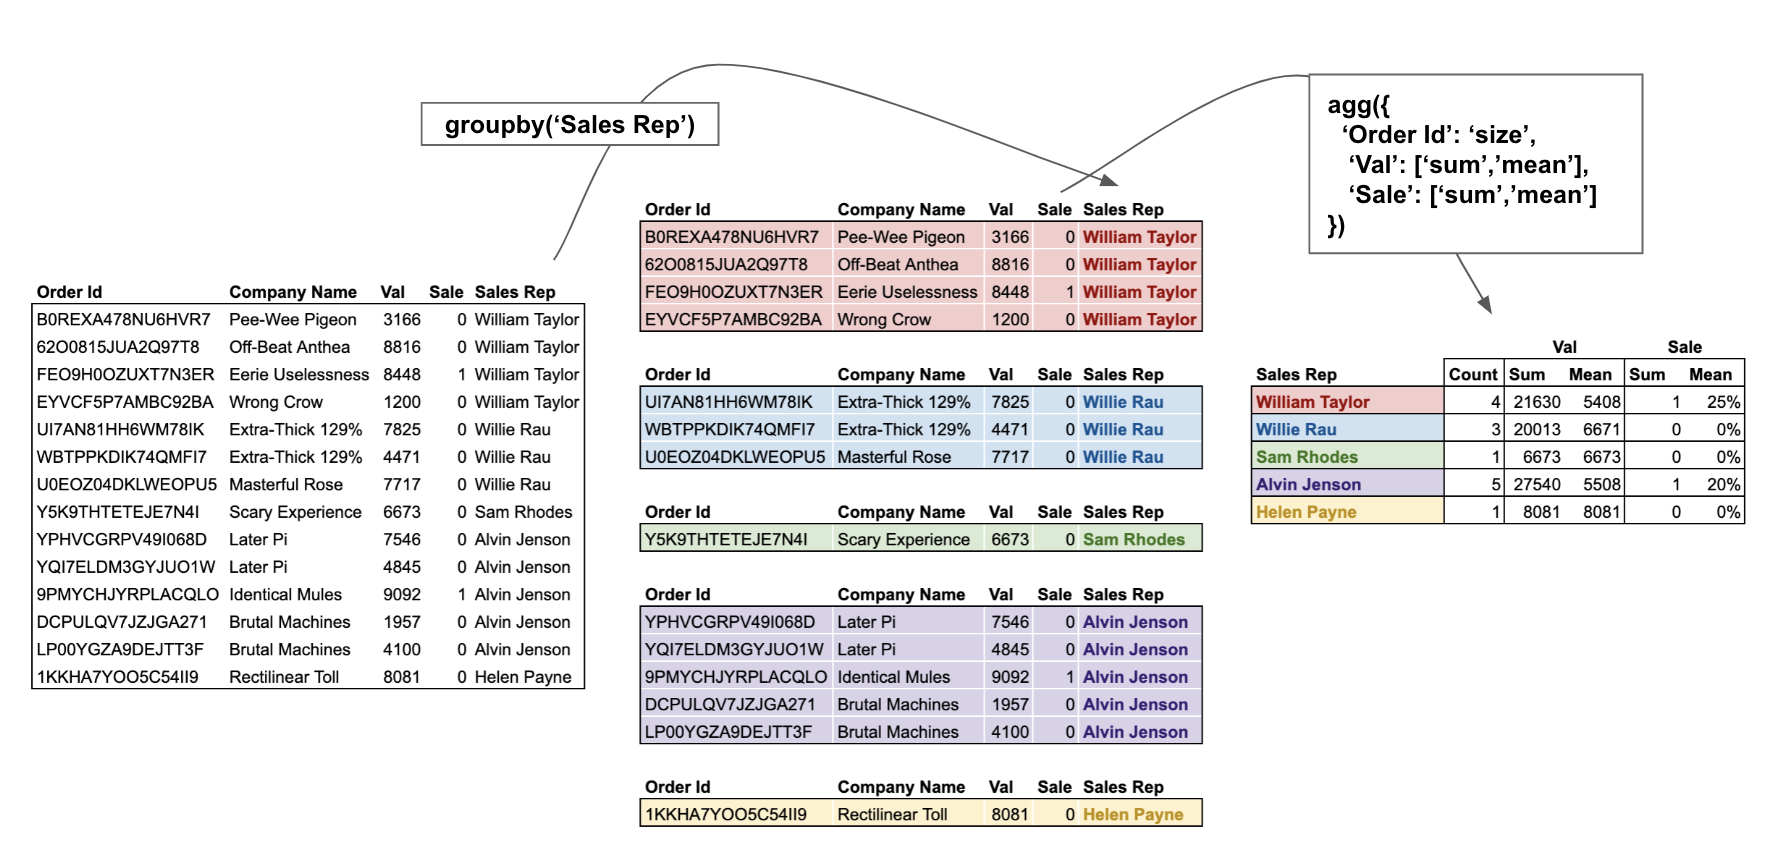

In [561]:
Image(filename='groupby-agg.png') 

In [562]:
# agg(regation)
df.groupby('Sales Rep')\
\
.agg({
    'Order Id':'size',
    'Val':['sum','mean'],
    'Sale':['sum','mean']
})

Order Id      Val              Sale          
                      size      sum         mean  sum      mean
Sales Rep                                                      
Aaron Hendrickson      292  1550608  5310.301370   46  0.157534
Adam Sawyer            324  1587828  4900.703704   48  0.148148
Adele Kimmel           115   527339  4585.556522   20  0.173913
Adrian Daugherty       369  1841274  4989.902439   51  0.138211
Adrianna Shelton        37   186651  5044.621622    8  0.216216
...                    ...      ...          ...  ...       ...
Willie Lin              44   254128  5775.636364    6  0.136364
Willie Rau              95   434918  4578.084211   19  0.200000
Willie Sanchez         309  1525229  4936.016181   52  0.168285
Yvonne Jones            74   416388  5626.864865   12  0.162162
Yvonne Lindsey          67   324334  4840.805970   18  0.268657

[499 rows x 5 columns]

In [563]:
def cr(x):
    return round(np.mean(x),2)

aggregation = {
    'Potential Sales':('Val','size'),
    'Sales':('Sale','sum'),
    'Conversion Rate':('Sale',cr)
}

df.groupby('Sales Rep').agg(**aggregation)

,Potential Sales,Sales,Conversion Rate
Sales Rep,,,
Aaron Hendrickson,292,46,0.16
Adam Sawyer,324,48,0.15
Adele Kimmel,115,20,0.17
Adrian Daugherty,369,51,0.14
Adrianna Shelton,37,8,0.22
...,...,...,...
Willie Lin,44,6,0.14
Willie Rau,95,19,0.20
Willie Sanchez,309,52,0.17


In [564]:
def cr(x):
    return round(np.mean(x),2)

_ = df.groupby('Sales Rep').agg({
    'Val':'size',
    'Sale':['sum',cr]
})

_.columns = ['Potential Sales','Sales','Conversion Rate']
_

,Potential Sales,Sales,Conversion Rate
Sales Rep,,,
Aaron Hendrickson,292,46,0.16
Adam Sawyer,324,48,0.15
Adele Kimmel,115,20,0.17
Adrian Daugherty,369,51,0.14
Adrianna Shelton,37,8,0.22
...,...,...,...
Willie Lin,44,6,0.14
Willie Rau,95,19,0.20
Willie Sanchez,309,52,0.17


## Transform

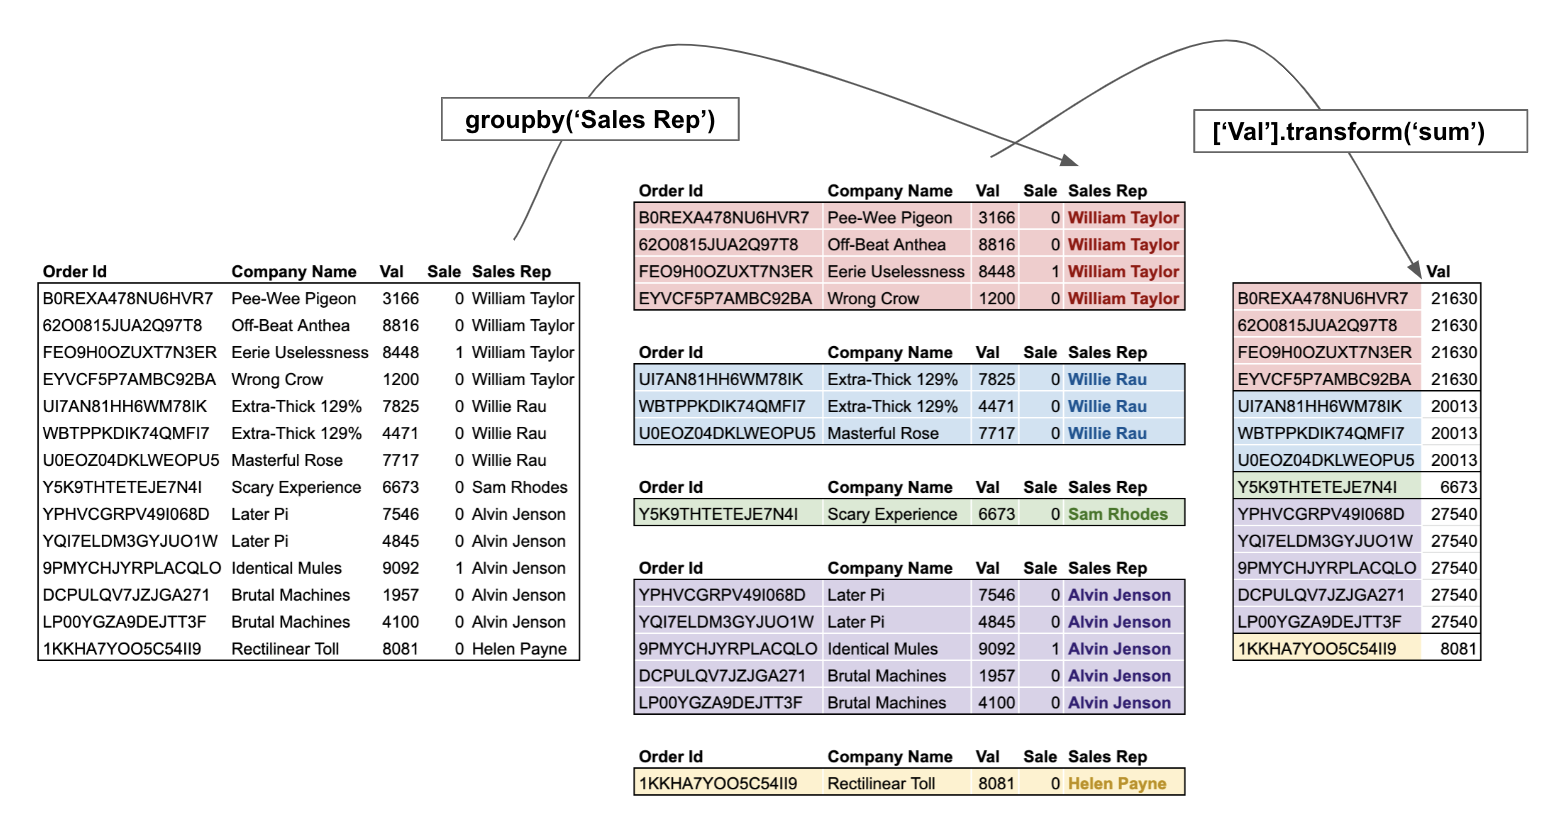

In [567]:
Image(filename='groupby-transform.png') 

In [568]:
df.groupby('Sales Rep')['Val'].transform(lambda x: x/sum(x))

0        0.004991
1        0.005693
2        0.003976
3        0.000799
4        0.003300
           ...   
99995    0.012088
99996    0.000711
99997    0.013741
99998    0.010695
99999    0.001533
Name: Val, Length: 100000, dtype: float64

In [569]:
df['%'] = df.groupby('Sales Rep')['Val'].transform(
  lambda x: x/sum(x)
)

In [570]:
del df['%']

In [571]:
# filter (at least 200k in sales)
df.groupby('Sales Rep').filter(lambda x: (x['Val'] * x['Sale']).sum() > 200000)

,Order Id,Company Id,Company Name,Date,Val,Sale,Sales Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ
...,...,...,...,...,...,...,...,...
99129,GVRNNUAPFE0IUBHW,BLURX3WQK51RI6P7,Baptismal Tensions,2014-01-11,2677,0,Richard Dugas,Y43HS5H6PAP34ER5
99130,GX4S2LXPU3VZOS4Z,BLURX3WQK51RI6P7,Baptismal Tensions,2018-05-12,6877,0,Richard Dugas,Y43HS5H6PAP34ER5
99131,FU4ELGDQEGSGOHFZ,BLURX3WQK51RI6P7,Baptismal Tensions,2014-10-16,9189,0,Richard Dugas,Y43HS5H6PAP34ER5
99132,S553MU5UDAUID8TG,BLURX3WQK51RI6P7,Baptismal Tensions,2016-05-01,2013,0,Richard Dugas,Y43HS5H6PAP34ER5


In [572]:
# Let's add this for verification
df['cr'] = df.groupby('Sales Rep')['Sale'].transform('mean')

df.groupby('Sales Rep').filter(lambda x: x['Sale'].mean() > .3)

,Order Id,Company Id,Company Name,Date,Val,Sale,Sales Rep,Sales Rep Id,cr
3897,4MWBSVADRWSNLBA0,4D9PJORE7YYNDV2E,Qualitative Asimov'S,2014-03-17,2637,0,Teddy Cook,36I1D97CG4V8ATKV,0.315789
3898,8C13U50FF5ZKU1TJ,4D9PJORE7YYNDV2E,Qualitative Asimov'S,2015-10-26,9495,0,Teddy Cook,36I1D97CG4V8ATKV,0.315789
3899,D6Y3HVKNT480ADL1,4D9PJORE7YYNDV2E,Qualitative Asimov'S,2017-12-09,9156,0,Teddy Cook,36I1D97CG4V8ATKV,0.315789
3900,JXO5XMLWEDZKLGCG,4D9PJORE7YYNDV2E,Qualitative Asimov'S,2016-07-05,1219,0,Teddy Cook,36I1D97CG4V8ATKV,0.315789
3901,37PVLZLXMXRCZLNK,4D9PJORE7YYNDV2E,Qualitative Asimov'S,2018-03-07,4374,0,Teddy Cook,36I1D97CG4V8ATKV,0.315789
...,...,...,...,...,...,...,...,...,...
94627,H72B7571AMUFAH2A,JQ7DP9EX0HY1OKRU,Road-Shy Small-Town,2015-08-07,2764,0,Jennifer Peck,UTJ4LM946FZQSCN1,0.304348
94628,SFQVIH3PNXVLR7PM,JQ7DP9EX0HY1OKRU,Road-Shy Small-Town,2014-11-28,1008,0,Jennifer Peck,UTJ4LM946FZQSCN1,0.304348
94629,B4GFG6BPT1HOHJOU,JQ7DP9EX0HY1OKRU,Road-Shy Small-Town,2018-06-27,8999,0,Jennifer Peck,UTJ4LM946FZQSCN1,0.304348
94630,7ZO3XQ1C3U3BOM6T,JQ7DP9EX0HY1OKRU,Road-Shy Small-Town,2015-02-19,2079,0,Jennifer Peck,UTJ4LM946FZQSCN1,0.304348


In [573]:
del df['cr']

# Advanced Examples Agg

In [576]:
# Grouping by 3 evenly cut "Order Value" buckets
df.groupby(
    pd.qcut(df['Val'],3,['low','mid','high'])
).agg({'Val':['mean','std'],'Sale':['sum','size']})

Val              Sale       
             mean         std   sum   size
Val                                       
low   1759.218063  955.198008  5653  33339
mid   5078.456234  957.488032  5577  33336
high  8352.541395  945.261300  5678  33325

In [577]:
# Grouping by cutom "Order Value" buckets
df.groupby(
    pd.cut(df['Val'],[0,3000,5000,7000,10000])
).agg({'Val':['mean','std'],'Sale':['sum','size']})

Val              Sale       
                      mean         std   sum   size
Val                                                
(0, 3000]      1555.837474  839.194392  4913  29220
(3000, 5000]   3998.367283  579.842580  3389  19892
(5000, 7000]   5999.759369  582.543076  3399  20359
(7000, 10000]  8488.592355  868.442376  5207  30529

In [578]:
df.groupby(
    pd.cut(df['Val'],[0,5000,10000],labels=['low','high'])
).agg(
    **{'Conversion Rate':pd.NamedAgg(column='Sale',aggfunc=lambda x: sum(x)/len(x))}
)

,Conversion Rate
Val,
low,0.169042
high,0.169116


In [579]:
# grouping by year and a cut oder value column
df.groupby(
    [pd.Grouper(key='Date',freq='Y'),pd.qcut(df['Val'],3,['low','mid','high'])]
).agg(
    **{'Conversion Rate':pd.NamedAgg(column='Sale',aggfunc=lambda x: sum(x)/len(x))}
).unstack()

Conversion Rate                    
Val                    low       mid      high
Date                                          
2014-12-31        0.185964  0.185123  0.182244
2015-12-31        0.192487  0.184618  0.191403
2016-12-31        0.193346  0.189693  0.195297
2017-12-31        0.151350  0.151591  0.155423
2018-12-31        0.123520  0.124867  0.127470

In [580]:
!open .